# Task 1

## Read files

In [3]:
import pandas as pd
import json



In [12]:
users_df = pd.read_csv('users.csv')
users_df.head()

,user_id,age,gender,country
0,1,38,female,Morocco
1,2,30,female,Jordan
2,3,42,male,Saudi Arabia
3,4,57,female,Egypt
4,5,51,female,Jordan


In [6]:
episodes_df = pd.read_csv('episodes.csv')
episodes_df.head()

,episode_id,title,category
0,1,Episode 1,Religion
1,2,Episode 2,Technology
2,3,Episode 3,Society
3,4,Episode 4,News
4,5,Episode 5,Politics


In [10]:
# Load listening data with JSON to DataFrame conversion
listens_file = '/content/listens.json'
with open(listens_file, 'r') as f:
    listens_data = json.load(f)
listens_df = pd.DataFrame(listens_data)
listens_df.head()

,user_id,episode_id,duration_seconds
0,16,30,60
1,6,8,120
2,6,13,60
3,6,27,1500
4,17,9,1500



## Data cleaning


In [14]:
users_df.dropna(inplace=True)
episodes_df.dropna(inplace=True)
listens_df.dropna(inplace=True)

In [15]:
istens_df = listens_df[listens_df['duration_seconds'] > 0]  # Keep only rows with valid listening durations (> 0 seconds)

In [17]:
# Merge data
merged_df = listens_df.merge(users_df, on='user_id').merge(episodes_df, on='episode_id')

# Task 2

## Data analysis

In [18]:
category_counts = merged_df['category'].value_counts()
print("Most listened-to categories:")
print(category_counts)

Most listened-to categories:
category
Society       32
Sports        30
News          16
Religion      10
Politics       7
Technology     5
Name: count, dtype: int64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

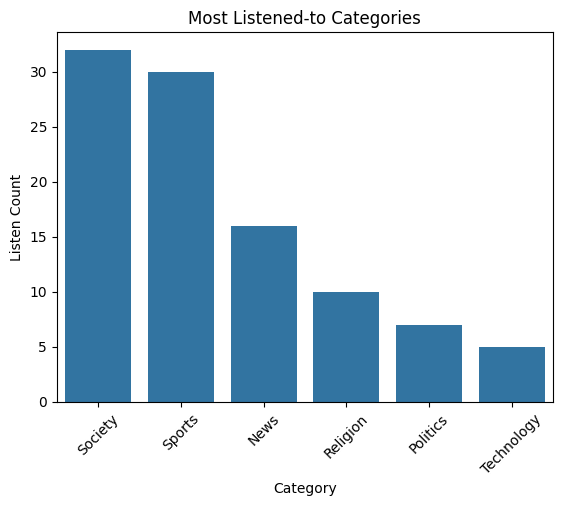

In [21]:
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title("Most Listened-to Categories")
plt.xlabel("Category")
plt.ylabel("Listen Count")
plt.xticks(rotation=45)
plt.show()

In [22]:
# Average listening duration by gender
avg_duration_by_gender = merged_df.groupby('gender')['duration_seconds'].mean()
print("\nAverage listening duration by gender:")
print(avg_duration_by_gender)


Average listening duration by gender:
gender
female    753.962264
male      573.191489
Name: duration_seconds, dtype: float64


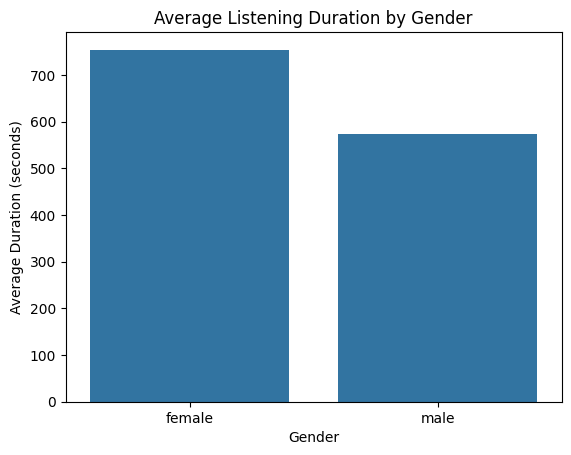

In [23]:
sns.barplot(x=avg_duration_by_gender.index, y=avg_duration_by_gender.values)
plt.title("Average Listening Duration by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Duration (seconds)")
plt.show()

In [24]:
# Average number of episodes per user
avg_episodes_per_user = listens_df.groupby('user_id')['episode_id'].count().mean()
print(f"\nAverage number of episodes listened to per user: {avg_episodes_per_user:.2f}")


Average number of episodes listened to per user: 5.26


### Additional insights

In [27]:
# Hypothesis: Age could influence listening preferences
age_group_listens = merged_df.groupby(pd.cut(merged_df['age'], bins=[14, 18,20, 30, 40, 50,60,70,80]))['duration_seconds'].mean()
print("\nAverage listening duration by age group:")
print(age_group_listens)


Average listening duration by age group:
age
(14, 18]           NaN
(18, 20]    771.428571
(20, 30]    665.454545
(30, 40]    972.000000
(40, 50]    637.058824
(50, 60]    573.333333
(60, 70]           NaN
(70, 80]           NaN
Name: duration_seconds, dtype: float64


<ipython-input-27-aa7ee247a720>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_listens = merged_df.groupby(pd.cut(merged_df['age'], bins=[14, 18,20, 30, 40, 50,60,70,80]))['duration_seconds'].mean()


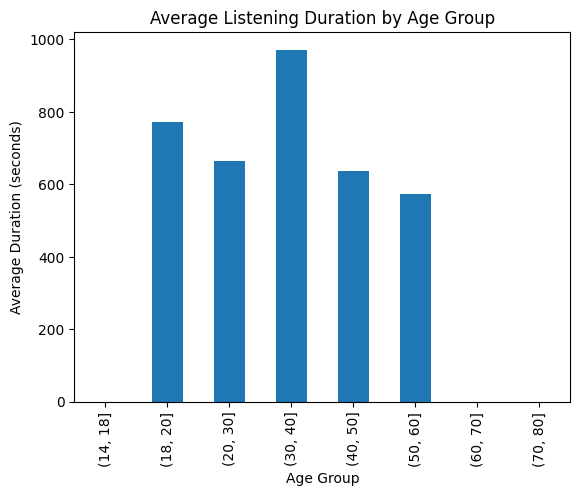

In [28]:
age_group_listens.plot(kind='bar')
plt.title("Average Listening Duration by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Duration (seconds)")
plt.show()

# Task 3

## Generate initial ideas

In [34]:
def recommend_episodes(user_id, listens_df, episodes_df, top_n=3):
    """Smart recommendation function to suggest episodes based on user's favorite categories and unseen episodes."""
    # Filter listens for the specific user
    user_listens = listens_df[listens_df['user_id'] == user_id]

    # Identify the favorite categories of the user
    if user_listens.empty:
        return "No listening history for user."

    favorite_categories = user_listens.merge(episodes_df, on='episode_id')['category'].value_counts().index

    # Filter out episodes already listened to
    listened_episodes = user_listens['episode_id'].unique()
    unseen_episodes = episodes_df[~episodes_df['episode_id'].isin(listened_episodes)]

    # Recommend episodes from favorite categories
    recommended = unseen_episodes[unseen_episodes['category'].isin(favorite_categories)].head(top_n)

    if recommended.empty:
        return "No recommendations available based on favorite categories."

    return recommended[['episode_id', 'title', 'category']]

In [35]:
# Test the recommendation function
user_id_to_test = 1
recommendations = recommend_episodes(user_id_to_test, listens_df, episodes_df)
print(f"\nRecommended episodes for user {user_id_to_test}:\n{recommendations}")


Recommended episodes for user 1:
   episode_id      title  category
2           3  Episode 3   Society
5           6  Episode 6   Society
6           7  Episode 7  Religion
